##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP7.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


In [2]:
df_knn = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
df_knn.columns = ['sepal length','sepal width','petal length','petal width','class label']
df_knn.head()

,sepal length,sepal width,petal length,petal width,class label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df_knn.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_knn["class label"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class label, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_knn["class label"])
df_knn["class label"]=label_encoder.transform(df_knn["class label"])
df_knn.head()

,sepal length,sepal width,petal length,petal width,class label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [22]:
X = df_knn[["sepal length", "sepal width", "petal length", "petal width"]].values
y = df_knn[["class label"]].values

In [8]:
X_knn = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [9]:
from sklearn.model_selection import train_test_split
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y, test_size=0.7, random_state=4)
print ('Навчальна вибірка:', X_knn_train.shape,  y_knn_train.shape)
print ('Тестова вибірка:', X_knn_test.shape,  y_knn_test.shape)

Навчальна вибірка: (44, 4) (44, 1)
Тестова вибірка: (105, 4) (105, 1)


### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм kNN для $k=3$, $k=5$, використовуючи евклідову метрику та манхеттенську метрику
* порівняйте результати точності для цих моделей
* визначіть оптимальне $k$ за допомогою `GridSearchCV`
* зробіть висновки


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
def train_and_predict_knn(k):
    neigh = KNeighborsClassifier(n_neighbors = k, p=1).fit(X_knn_train,y_knn_train)
    print("Точність на навчальних даних:", metrics.accuracy_score(y_knn_train, neigh.predict(X_knn_train)))
    print("Точність на тестових даних:", metrics.accuracy_score(y_knn_test, neigh.predict(X_knn_test)))

In [12]:
train_and_predict_knn(3)

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9142857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
train_and_predict_knn(5)

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9238095238095239


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [14]:
from sklearn.pipeline import Pipeline 

In [15]:
knn_pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('knn', KNeighborsClassifier())])
knn_params = {'knn__n_neighbors': range(1, 10)}

In [16]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5)

In [ ]:
knn_grid.fit(X_knn_train, y_knn_train)

In [18]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 2}, 0.9777777777777779)

In [19]:
metrics.accuracy_score(y_knn_test, knn_grid.predict(X_knn_test))

0.9238095238095239

### Висновки

На цій невеликій вибірці метод knn показав себе більш ніж задовільно. Вибір параметра між 3 та 5 не вплинув на точність в негативний бік. Після використання Gridsearch Виявилось, що достатнім параметром для отримання задовільної точності буде 2.

### Завдання №3

* Проведіть стандартизацію даних
* застосуйте алгоритм дерева рішень з критерієм `entropy` 
* візуалізуйте дерево
* оцініть точність класифікації
* застосуйте алгоритм дерева рішень з критерієм `gini` 
* візуалізуйте дерево
* оцініть точність класифікації
* визначіть оптимальну кількість характеристик в моделі та глибину дерева за допомогою `GridSearchCV`
* зробіть висновки

In [23]:
X_dt = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [26]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.7, random_state=4)
print ('Навчальна вибірка:', X_dt_train.shape,  y_dt_train.shape)
print ('Тестова вибірка:', X_dt_test.shape,  y_dt_test.shape)

Навчальна вибірка: (44, 4) (44, 1)
Тестова вибірка: (105, 4) (105, 1)


In [30]:
from sklearn.tree import DecisionTreeClassifier
def train_and_predict_tree(criterion):
    tree = DecisionTreeClassifier(criterion=criterion)
    tree.fit(X_dt_train, y_dt_train)
    print("Точність на навчальних даних:", metrics.accuracy_score(y_dt_train, tree.predict(X_dt_train)))
    print("Точність на тестових даних:", metrics.accuracy_score(y_dt_test, tree.predict(X_dt_test)))
    return tree

In [31]:
from sklearn import tree
def plot_tree(my_tree):
    plt.figure(figsize=(10,10))
    tree.plot_tree(
        my_tree,
        filled=True,
        feature_names=['sepal length','sepal width','petal length','petal width','class label'],
        class_names=['0', '1', '2']
    )
    plt.show()

In [32]:
entropy_tree = train_and_predict_tree("entropy")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9333333333333333


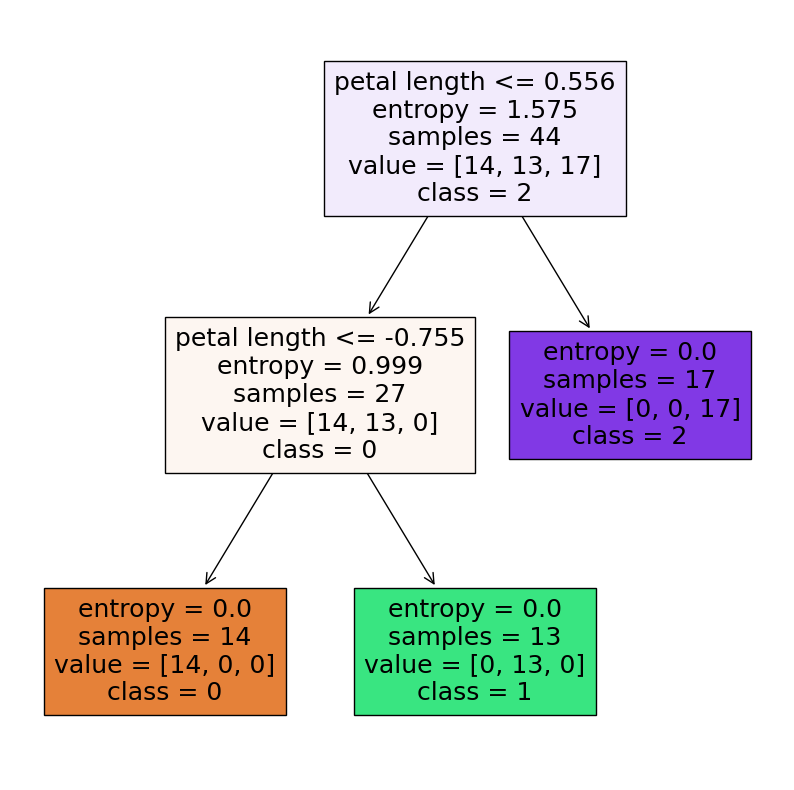

In [33]:
plot_tree(entropy_tree)

In [34]:
gini_tree = train_and_predict_tree("gini")

Точність на навчальних даних: 1.0
Точність на тестових даних: 0.9333333333333333


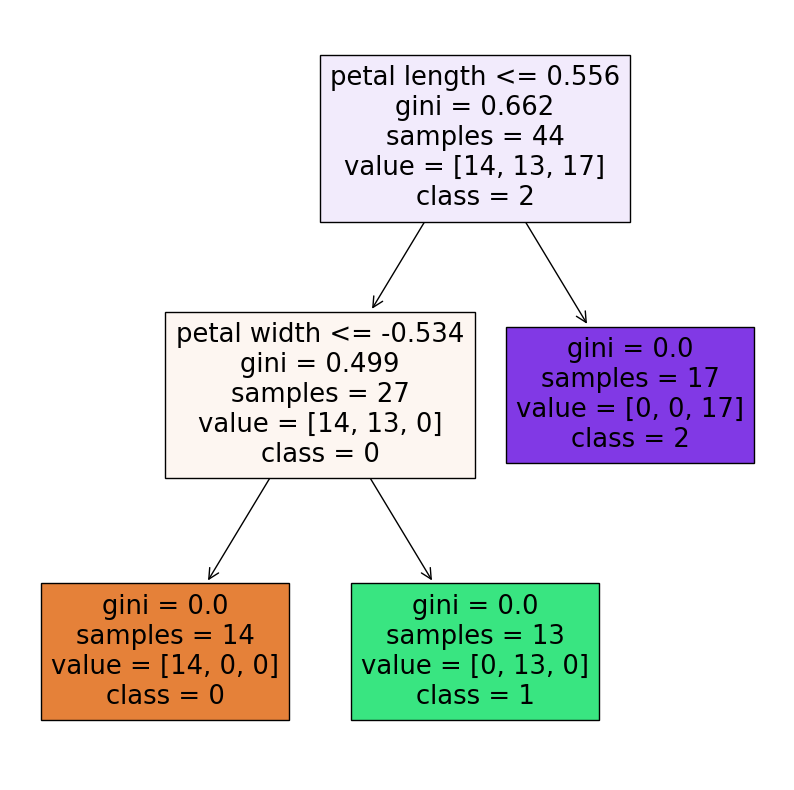

In [35]:
plot_tree(gini_tree)

In [40]:
dt_pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('dt', DecisionTreeClassifier())])
tree_params = {
    'dt__max_depth': range(1,6),
    'dt__max_features': range(1,6)
}

In [41]:
dt_grid = GridSearchCV(dt_pipe, tree_params, cv=5)

In [42]:
dt_grid.fit(X_dt_train, y_dt_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': range(1, 6),
                         'dt__max_features': range(1, 6)})

In [43]:
dt_grid.best_params_, dt_grid.best_score_

({'dt__max_depth': 2, 'dt__max_features': 3}, 0.9777777777777779)

In [44]:
metrics.accuracy_score(y_dt_test, dt_grid.predict(X_dt_test))

0.9333333333333333

### Висновки

на даному наборі даних метод DT показав себе добре. Отримані результати на 30% тренуваольної вибірки дозволили отримати точність у 0.93 на тествовій вибіррці.

### Завдання №4

Порівняйте результати класифікації методами kNN та дерева рішень для заданого набору даних

Обидва алгоритми показали себе добре на обраному наборі даних та досягли високої точності. KNN отримав трохи кращі результати. Плюсом обох методів є простота реалізації, особливо за допомогою бібліотеки sklearn. Ддя вирішення даної конкретної задачі вибір одного чи іншого алгоритма не зіграв влеикої ролі.